### Формула Байеса
### $ P(A_j|B) = \frac{P(B|A_j)P(A_j)}{P(B)} =\frac{P(B|A_j)P(A_j)}{\sum_{i=1}^{i=N} P(B|A_i)P(A_i)} $

## 1.1

$P(A_0|B)$ вероятность того, что у подсудимого была бы именно такая группа крови ($A_0$), если бы он был невиновен($B$)  
$P(B|A_0)$ - вероятность того, что подсудимый невиновен, при том что у него редкая группа крови. Иначе говоря, как много в процентном соотношении людей не являются убийцами, среди имеющих такую же кровь.  
$P(A_0)$ - вероятность иметь такую редкую кровь, которая была у убийцы. Величина равна как раз 1 проценту.  
$P(B)$ - вероятность быть неубийцей. Иначе говоря какой процент общества не является убийцами.

то есть вероятность того, что у подсудимого была бы именно такая группа крови, если бы он был невиновен $P(A_0|B) = \frac{P(B|A_0)0.01}{P(B)}$  
Нам не хватает информации про $P(B|A_0)$ и $P(B)$  
Этот факт ставит под сомнение первое утверждение прокурора: "Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен -- всего 1%"

Второе его утверждение: "значит, с вероятностью 99% он виновен" неправильно так как, если бы даже первое утверждение было верным и $P(A_0|B)$ было бы равным 0.01, то из этого никак не следует, что $P(!B|A_0) = 1 - P(A_0|B)$

## 1.2

$P(A_0|B)$ вероятность того, что подсудимый виновен ($A_0$), если бы у него была была редкая кровь убийцы($B$)  
$P(B|A_0)$ - вероятность того, что у подсудимого редкая кровь, при том что он - убийца. Иначе говоря, как много в процентном соотношении убийц имеют такую же кровь.  
$P(A_0)$ - вероятность быть убийцей.  
$P(B)$ - вероятность иметь такую кровь. Иначе говоря какой процент общества имеет такую кровь.  
Вероятность быть убийцей обладая такой кровью:  
$P(A_0|B) = \frac{P(B|A_0)P(A_0)}{0.01}$  
А это совсем необязательно равно 0.01

## 1.3

Вероятность оказаться больным при отрицательном тесте:  
$ P(ill|neg) = \frac{P(neg|ill)P(ill)}{P(neg|ill)P(ill) + P(neg|!ill)P(!ill)} $  
Вероятность оказаться здоровым при положительном тесте:
$ P(!ill|pos) = \frac{P(pos|!ill)P(!ill)}{P(pos|ill)P(ill) + P(pos|!ill)P(!ill)} $  


Варьируем величину $P(neg|ill)$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
p_ill = 0.01
p_not_ill = 1.0 - p_ill
p_var = np.arange(0.95, 1.0, 0.01)
p_not_var = 1. - p_var
p_ill_neg = p_not_var * p_ill / (p_not_var * p_ill + p_var * p_not_ill)
p_ill_pos = p_var * p_ill / (p_var * p_ill + p_not_var * p_not_ill)

Text(0, 0.5, 'вероятность болеть при отрицательном тесте')

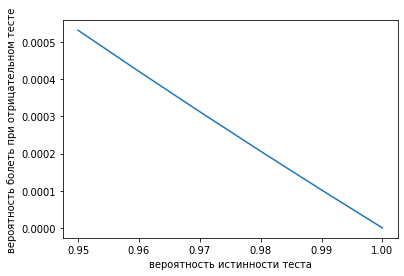

In [4]:
plt.plot(p_var, p_ill_neg)
plt.xlabel("вероятность истинности теста")
plt.ylabel("вероятность болеть при отрицательном тесте")

Text(0, 0.5, 'вероятность болеть при положительном тесте')

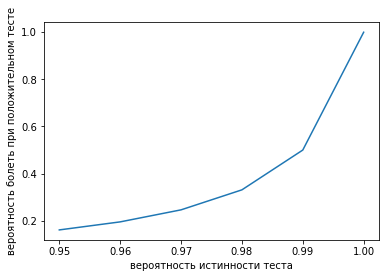

In [5]:
plt.plot(p_var, p_ill_pos)
plt.xlabel("вероятность истинности теста")
plt.ylabel("вероятность болеть при положительном тесте")

По первому графику видно, что веротяность болеть при отрицательном тесте и так достаточно мала, а какие-либо улучшения не сильно поднимут качество этого теста.
А вот по второму графику видно, что тут еще улучшать и улучшать, поэтому я бы посоветовал сосредоточиться на уменьшении false positives

## 2.1

In [6]:
import pandas as pd
dataset = pd.read_csv("owid-covid-data.csv", parse_dates=["date"])
df = dataset[dataset.location == 'Russia'][dataset.date >= pd.to_datetime("2020-03-03")]
df.head()

/home/lenar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
50891,RUS,Europe,Russia,2020-03-03,3.0,0.0,0.143,NaN,NaN,0.0,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
50892,RUS,Europe,Russia,2020-03-04,3.0,0.0,0.143,NaN,NaN,0.0,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
50893,RUS,Europe,Russia,2020-03-05,4.0,1.0,0.286,NaN,NaN,0.0,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
50894,RUS,Europe,Russia,2020-03-06,13.0,9.0,1.571,NaN,NaN,0.0,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
50895,RUS,Europe,Russia,2020-03-07,13.0,0.0,1.571,NaN,NaN,0.0,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824


In [7]:
# упрощение, от которого в будущем можно избавиться
df.new_cases = df.new_cases.apply(lambda x: 1 if x == 0 else x)
df.total_cases = df.total_cases.apply(lambda x: 1 if x == 0 else x)

In [8]:
train = df.head(50)

## 2.2

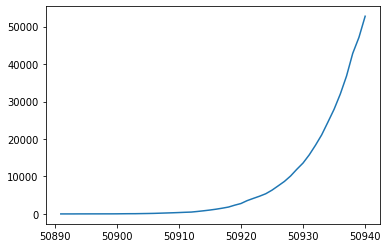

In [9]:
plt.plot(train.total_cases)

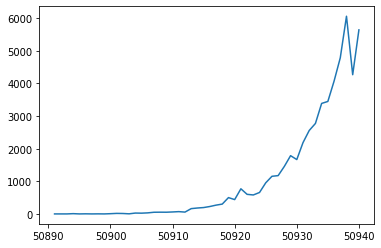

In [10]:
plt.plot(train.new_cases)

## 2.2.a

In [11]:
from sklearn.linear_model import LinearRegression
actual = np.log10(train.total_cases).values
x_train = np.arange(len(actual)).reshape((len(actual), 1))
model = LinearRegression()
model.fit(x_train, actual)
predicted = x_train * model.coef_ + model.intercept_

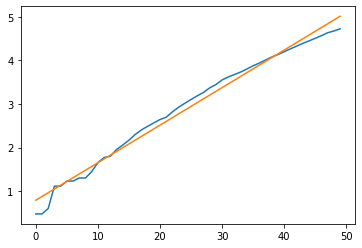

In [12]:
plt.plot(x_train, actual)
plt.plot(x_train, predicted)

In [14]:
print(model.coef_[0], model.intercept_)

0.08611664903903658 0.7907360967134536


## 2.2.b

Параметры апостериорного распределения параметров линейной регрессии при условии гауссового априорного распределния параметров имеют вид:  
$\Sigma^{-1} = \Sigma_0^{-1} + \frac{X^TX}{\sigma^2}$  
$\mu = \Sigma(\Sigma_0^{-1}\mu_0+\frac{X^Ty}{\sigma^2})$

Так как учитывается зависимость только от номера дня, следовательно в линейной регрессии будут присутствовать два параметра - w(вес) и b(bias), имеющие априорные распределения с матожиданиями(их мы выбираем для нашего удобства) $\mu_w = \mu_b=0$, и дисперсиями $\sigma_w^2 = \sigma_b^2 = \sigma^2 = 10$ (для удобства выберем равными).  

In [16]:
def bayesian_update(mu, sigma, x, y, sigma_noise):
    x_matrix = np.array(list(zip([1.]*len(x), x)))
    sigma_n = np.linalg.inv(np.linalg.inv(sigma)+ (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), x_matrix) )
    mu_n = np.matmul(sigma_n, np.dot(np.linalg.inv(sigma), mu) + (1 / (sigma_noise ** 2)) * np.dot(np.transpose(x_matrix), y ) )
    return mu_n, sigma_n

In [20]:
mu = np.array([0, 0])
sigma = np.array([[10., 0], [0, 10.]])
sigma_noise = (np.var(actual - predicted))**0.5

mu_new, sigma_new = bayesian_update(mu, sigma, x_train.reshape(len(x_train)), actual, sigma_noise)

In [21]:
mu_new

array([0.77214303, 0.08667941])

In [22]:
sigma_new

array([[ 0.23591475, -0.00714888],
       [-0.00714888,  0.00029361]])

Полученный результат апостериорного распределения неплохо согласуется с результатом линейной регрессии, там результат w = 0.08611664903903658 b = 0.7907360967134536, тут -  w = 0.08667941 b = 0.77214303

Апостериорная вероятность определяется как:  
$N(\mu, \Sigma)$

## 2.3.a

Прирост числа заболевших ото дня ко дню - есть производная данной функции, то есть можно перейти от total_cases к new_cases, таким образом, избавимся от интеграла. Логарифм производной равен:  
$const-\frac{a}{2}(x^2-2x\mu+\mu^2)$  
Тут $a, \mu$ стоит воспринимать как некие параметры. То есть можно ввести дополнительный признак $x^2$, запустить линейную регрессию на этих данных, по получившимся коэффициентам построить параболу и посчитать дисперсию, а дальше как в 2.2.b

In [23]:
actual = np.log10(train.new_cases).values
x_train = np.array(list(zip(np.arange(len(actual)),np.arange(len(actual))**2))) 
model = LinearRegression()
model.fit(x_train, actual)
predicted = x_train[:,0] * model.coef_[0] + x_train[:,1] * model.coef_[1] + model.intercept_

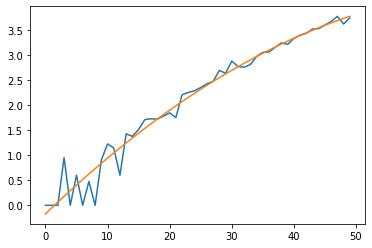

In [27]:
plt.plot(x_train[:,0], actual)
plt.plot(x_train[:, 0], predicted)

In [28]:
model.coef_

array([ 0.11970147, -0.00079467])

In [50]:
model.intercept_

-0.1722370235299051

## 2.3.b

In [52]:
def bayesian_update(mu, sigma, x, y, sigma_noise):
    x_matrix = []
    print(x_matrix)
    for i in range(len(x)):
        x_matrix.append([1., x[i,0], x[i,1]])
    x_matrix = np.array(x_matrix)
    sigma_n = np.linalg.inv(np.linalg.inv(sigma)+ (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), x_matrix) )
    mu_n = np.matmul(sigma_n, np.dot(np.linalg.inv(sigma), mu) + (1 / (sigma_noise ** 2)) * np.dot(np.transpose(x_matrix), y ) )
    return mu_n, sigma_n

In [53]:
mu = np.array([0, 0, 0])
sigma = np.array([[10., 0, 0], [0, 10., 0], [0, 0, 50]])
sigma_noise = (np.var(actual - predicted))**0.5

mu_new, sigma_new = bayesian_update(mu, sigma, x_train, actual, sigma_noise)

[]


In [54]:
mu_new

array([-0.17210057,  0.11969024, -0.00079448])

In [55]:
sigma_new

array([[ 7.50140539e-03, -6.06070027e-04,  1.02031900e-05],
       [-6.06070027e-04,  6.68391551e-05, -1.27573849e-06],
       [ 1.02031900e-05, -1.27573849e-06,  2.60377018e-08]])

Полученный результат апостериорного распределения неплохо согласуется с результатом линейной регрессии, там результат w = (0.11970147, -0.00079467) b = -0.1722370235299051, тут -  w = 0.11969024, -0.00079448 b = -0.17210057

При этом в данной модели апостериорная вероятность лучше согласуется с результатом лин. регрессии, и матрица дисперсий прям сильно лучше (значения меньше в разы)

Апостериорная вероятность определяется как:  
$N(\mu, \Sigma)$